<a href="https://colab.research.google.com/github/J-Kiruthika/Python-for-DataScience/blob/master/Flipr_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flipr Hackathon 6.0 - Machine Learning** ###

---

### **Prediction Analsysis**

*Importing all necessary libraries*

In [202]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

**Train and test data description**

*Reading the train data* 

In [203]:
train = pd.read_excel('/content/train-processed.xlsx')
train.head()


,Unnamed: 0,city,city_type,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,hospitals,foreign_visitors,Population Estimated for 2020 Till Aug,covid_cases
0,0,mumbai,17,23,32,1,219,150,0.700440,159,4408916,12860011,163115
1,1,delhi,17,27,30,1,215,196,0.920018,148,2379169,12097762,80188
2,2,bangalore,20,28,37,0,212,102,0.097085,123,636502,15466316,141000
3,3,hyderabad,20,23,31,1,217,118,0.827744,110,126078,11957467,55123
4,4,ahmedabad,20,29,25,2,227,109,0.847941,73,284973,8382870,33204


*Reading the test data*

In [236]:
test = pd.read_csv('/content/TestDataFinal (1).csv')
test.head()

,Unnamed: 0,city,city_type,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,hospitals,foreign_visitors,population_till_aug
0,0,tuensang,6,23.0,10.0,MEDIUM,94.0,114.0,0.253390,17.0,2769.0,48234.315986
1,1,lakshmeshwar,14,25.0,38.0,HIGH,62.0,160.0,0.192555,13.0,636502.0,48187.482655
2,2,zira,18,29.0,35.0,HIGH,63.0,105.0,0.887882,17.0,242367.0,42789.621241
3,3,yawal,18,26.0,31.0,HIGH,60.0,174.0,0.407838,11.0,4408916.0,42759.333477
4,4,thanabhawan,1,28.0,39.0,LOW,92.0,153.0,0.324456,23.0,3104060.0,48089.854380


*Normalising the predicted 2020 population attribute*

In [205]:
train['Population Estimated for 2020 Till Aug'].round(2)
test['population_till_aug'].round(2)

0      48234.32
1      48187.48
2      42789.62
3      42759.33
4      48089.85
         ...   
496     2152.10
497     1989.48
498      802.61
499      144.26
500    32459.81
Name: population_till_aug, Length: 501, dtype: float64

*Converting categorical values of SWM to numerical in test data*

In [206]:
test.columns
test.head()
swm_categories = {"HIGH":0 ,"MEDIUM":1 ,"LOW":2}
test['swm'] = test['swm'].map(swm_categories)
test.head()

,Unnamed: 0,city,city_type,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,hospitals,foreign_visitors,population_till_aug
0,0,tuensang,6,23.0,10.0,1,94.0,114.0,0.253390,17.0,2769.0,48234.315986
1,1,lakshmeshwar,14,25.0,38.0,0,62.0,160.0,0.192555,13.0,636502.0,48187.482655
2,2,zira,18,29.0,35.0,0,63.0,105.0,0.887882,17.0,242367.0,42789.621241
3,3,yawal,18,26.0,31.0,0,60.0,174.0,0.407838,11.0,4408916.0,42759.333477
4,4,thanabhawan,1,28.0,39.0,2,92.0,153.0,0.324456,23.0,3104060.0,48089.854380


*Listing the train columns*

In [207]:
train.columns

Index(['Unnamed: 0', 'city', 'city_type', 'median_age', 'avg_temp', 'swm',
       'toilets_avl', 'water_purity', 'h_index', 'hospitals',
       'foreign_visitors', 'Population Estimated for 2020 Till Aug',
       'covid_cases'],
      dtype='object')

**Splitting data as features and class label**

*X_train is Input attributes of training dataset*

In [209]:
X_train = train[['city_type', 'median_age', 'avg_temp', 'swm',
       'toilets_avl', 'water_purity', 'h_index', 'hospitals',
       'foreign_visitors','Population Estimated for 2020 Till Aug']].values
print(X_train[1])

[1.70000000e+01 2.70000000e+01 3.00000000e+01 1.00000000e+00
 2.15000000e+02 1.96000000e+02 9.20018232e-01 1.48000000e+02
 2.37916900e+06 1.20977620e+07]


*Y_train is Output class label of training dataset*

In [210]:
Y_train = train['covid_cases'].values
print(Y_train[0])

163115


*X_test is Input attributes of testing dataset*

In [211]:
X_test =  test[['city_type', 'median_age', 'avg_temp', 'swm',
       'toilets_avl', 'water_purity', 'h_index', 'hospitals',
       'foreign_visitors', 'population_till_aug']].values
print(X_test[0])

[6.0000000e+00 2.3000000e+01 1.0000000e+01 1.0000000e+00 9.4000000e+01
 1.1400000e+02 2.5339011e-01 1.7000000e+01 2.7690000e+03 4.8234316e+04]


**Predicitve Modeling**

*Linear Regression Model*

In [212]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train, Y_train)



0.519945288987552

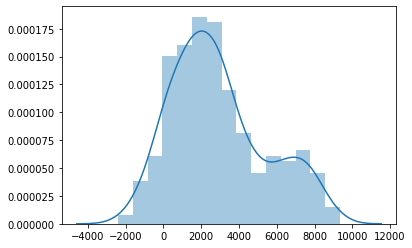

In [213]:
Y_test_reg = reg.predict(X_test) 
sb.distplot(Y_test_reg)


*Decision Tree*

In [216]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
dt = clf.fit(X_train, Y_train)
dt.score(X_train, Y_train)

0.9806953309100015

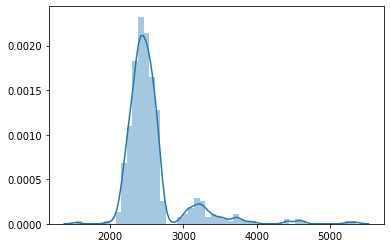

In [217]:
Y_test_dt = dt.predict(X_test) 
sb.distplot(Y_test_dt)

*AdaBoost Regressor*

In [219]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

abr = AdaBoostRegressor(random_state=0, n_estimators=200)
abr.fit(X_train, Y_train)
abr.score(X_train, Y_train)

0.8144467700431308

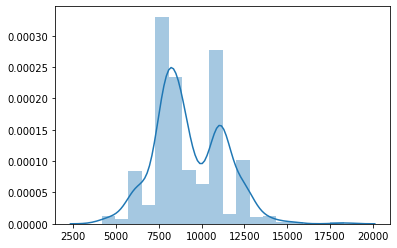

In [220]:
Y_test_abr = abr.predict(X_test) 
sb.distplot(Y_test_abr)

*Gradient Boosting Model*

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)

clf.score(X_train, Y_train)

0.9806953309100015

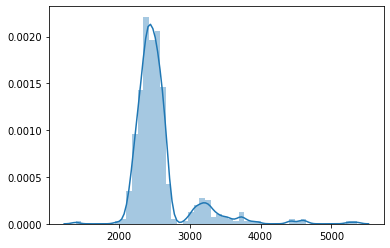

In [223]:
Y_test_clf = clf.predict(X_test) 
sb.distplot(Y_test_clf)

*MLP Regressor*

In [225]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(    hidden_layer_sizes=(128,256, 1024,128,64,32,16,8),
                       random_state=1,
                       activation="relu",
                       max_iter=500)
mlpreg.fit(X_train, Y_train)
mlpreg.score(X_train, Y_train)

0.659749042827804

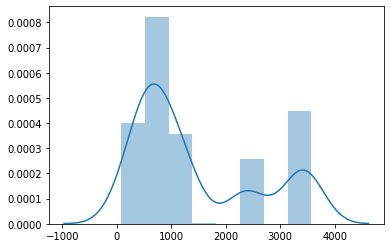

In [226]:
Y_test_mlpreg = mlpreg.predict(X_test) 
sb.distplot(Y_test_mlpreg)

*Random Forest*

In [228]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=100, random_state=0)
rfr.fit(X_train, Y_train)
rfr.score(X_train, Y_train)

0.9512339700467658

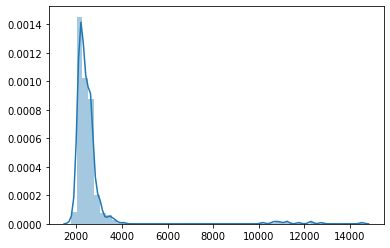

In [229]:
Y_test_rfr = rfr.predict(X_test) 
sb.distplot(Y_test_rfr)

*Combining all the predicted values to single DataFrame*

In [231]:
import pandas as pd
final_df = pd.DataFrame(list(zip(test['city'],Y_test_reg,Y_test_dt,Y_test_abr,Y_test_clf,Y_test_mlpreg,Y_test_rfr)))
final_df.head()

,0,1,2,3,4,5,6
0,tuensang,-34.079446,2096.326250,8336.437500,2096.326250,306.483592,2075.90
1,lakshmeshwar,2840.193511,2471.761207,11118.028571,2471.761207,895.227029,2262.74
2,zira,1225.735291,2628.252843,11170.800926,2628.252843,688.710751,2886.85
3,yawal,8014.684972,4593.677042,13833.333333,4593.677042,3362.858306,2229.43
4,thanabhawan,4410.051278,2305.605863,6773.885057,2305.605863,2446.803348,2486.03


*Renaming the column names*

In [237]:
final_df.columns = ['City', 'Linear_Regression','Decision_tree','AdaBoost','GradientBoosting','MLP','RandomForest']
final_df.head()

,City,Linear_Regression,Decision_tree,AdaBoost,GradientBoosting,MLP,RandomForest
0,tuensang,-34.079446,2096.326250,8336.437500,2096.326250,306.483592,2075.90
1,lakshmeshwar,2840.193511,2471.761207,11118.028571,2471.761207,895.227029,2262.74
2,zira,1225.735291,2628.252843,11170.800926,2628.252843,688.710751,2886.85
3,yawal,8014.684972,4593.677042,13833.333333,4593.677042,3362.858306,2229.43
4,thanabhawan,4410.051278,2305.605863,6773.885057,2305.605863,2446.803348,2486.03


*Exporting as CSV File*

In [234]:
final_df.to_csv('model_prediction.csv')

from google.colab import files
files.download('model_prediction.csv')